# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Author: Ankit Chatterjee


Copyright Ankit Chatterjee, 2021

In [1]:
#Importing all libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data_score = pd.read_csv(url)
print("Data imported successfully")
data_score.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#shape of dataset 
data_score.shape

(25, 2)

In [4]:
# check the info of data
data_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# check the description of student_score data
data_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#cheking skewness of the data
data_score.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

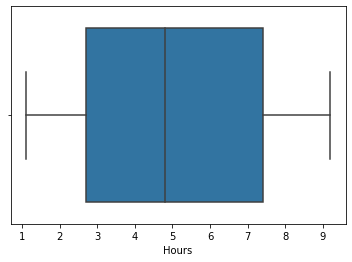

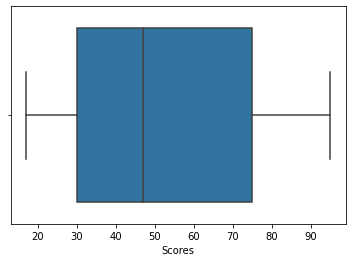

In [7]:
for i in data_score.columns:
    sns.boxplot(data_score[i])
    plt.show()

In [8]:
#so we are clearly say that here has no skew in this data.

# Data Visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [9]:
sns.set_style('whitegrid')

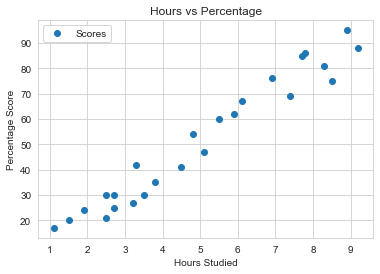

In [10]:
# Plotting the distribution of scores
data_score.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Linear Regression Model

Now we prepare the data and split it in test data.

In [11]:
X = data_score.iloc[:, :-1].values  
y = data_score.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [28]:
from sklearn.linear_model import LinearRegression  

In [29]:
lr = LinearRegression()  
lr.fit(X_train, y_train) 
print("Training complete")
y_predict= lr.predict(X_train)

Training complete


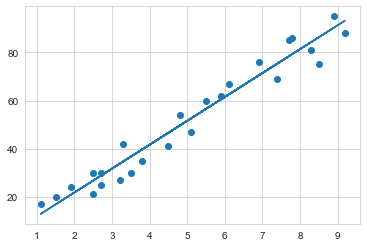

In [30]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

Checking the accuracy scores for training and test set¶

In [31]:
print('Test Score of the data')
print(lr.score(X_test, y_test))
print('Training Score of the data')
print(lr.score(X_train, y_train))

Test Score of the data
0.9454906892105356
Training Score of the data
0.9515510725211552


In [32]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
y_predict

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [34]:
y_predict[:5]

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217])

In [35]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [37]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', lr.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.69173249]


# Model Evaluation Metrics

In [ ]:
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [38]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 914.5549752244242
Mean absolute Error: 25.126667098277874
